In [29]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator
#dl libraraies
from keras import backend as K
from tensorflow.keras.models import Sequential,load_model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [2]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/IBM/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/IBM/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/IBM/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/IBM/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/IBM/flowers/rose'

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [59]:
train_datagen=ImageDataGenerator(rescale = 1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [60]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [61]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/flowers",target_size=(64,64),class_mode="categorical",batch_size=32)

Found 4317 images belonging to 5 classes.


In [62]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/flowers",target_size=(64,64),class_mode="categorical",batch_size=32)

Found 4317 images belonging to 5 classes.


In [63]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Activation

In [4]:
def assign_label(img,flower_type):
  return flower_type
def make_train_data(flower_type,DIR):
  for img in tqdm(os.listdir(DIR)):
    label=assign_label(img,flower_type)
    path = os.path.join(DIR,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    X.append(np.array(img))
    Z.append(str(label))

In [5]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip',FLOWER_TULIP_DIR)
make_train_data('Dandelion',FLOWER_DANDI_DIR)
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:10<00:00, 72.89it/s] 

4317


In [65]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [67]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [68]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 96)      

In [41]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 5)

Epoch 1/5
102/102 [==============================] - 175s 2s/step - loss: 0.9273 - accuracy: 0.6333 - val_loss: 0.9271 - val_accuracy: 0.6083
Epoch 2/5
102/102 [==============================] - 173s 2s/step - loss: 0.7942 - accuracy: 0.7019 - val_loss: 0.8961 - val_accuracy: 0.6352
Epoch 3/5
102/102 [==============================] - 171s 2s/step - loss: 0.7322 - accuracy: 0.7207 - val_loss: 0.8239 - val_accuracy: 0.6694
Epoch 4/5
102/102 [==============================] - 173s 2s/step - loss: 0.5972 - accuracy: 0.7782 - val_loss: 0.8225 - val_accuracy: 0.6639
Epoch 5/5
102/102 [==============================] - 173s 2s/step - loss: 0.4335 - accuracy: 0.8406 - val_loss: 0.9068 - val_accuracy: 0.6667


In [70]:
model.save("flower.h5")

In [71]:
model=load_model('flower.h5')

In [72]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [73]:
img=image.load_img(r"/content/drive/MyDrive/IBM/flowers/daisy/12701063955_4840594ea6_n.jpg")

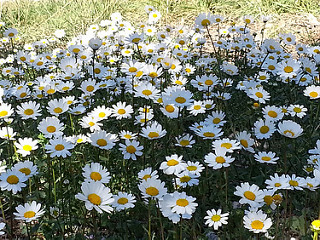

In [74]:
img

In [75]:
x=image.img_to_array(img)

In [76]:
#x

In [77]:
#x=np.expand_dims(x,axis=0)

In [78]:
#x

In [79]:
pred=model.predict(x_test)

In [80]:
pred

array([[0.20001931, 0.2000026 , 0.2000627 , 0.19992869, 0.19998668],
       [0.20001613, 0.20002131, 0.20001866, 0.19996789, 0.19997604],
       [0.1999966 , 0.20001885, 0.20007822, 0.19993152, 0.19997476],
       ...,
       [0.2000051 , 0.20005989, 0.20002775, 0.19991843, 0.19998889],
       [0.19998948, 0.20004661, 0.20003647, 0.19992636, 0.2000011 ],
       [0.20002176, 0.20002949, 0.20003024, 0.19995703, 0.1999615 ]],
      dtype=float32)

In [96]:
prediction = model.predict(x_test[:1])

In [94]:
index=['rose','dandelion','daisy','sunflower','tulip']

In [95]:
index[np.argmax(prediction)]

'daisy'